<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [1]:
println("The chance of the knight crossing the bridge safely is given by P(E3) = 0.06")

The chance of the knight crossing the bridge safely is given by P(E3) = 0.06


### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, the knight is wrong. He believes that by capturing a troll, he has to face outcomes E2 or E3 and chances of E2 or E3 is 80%. However, by capturing one troll, the outcome E3 is actually no longer possible, which means that only outcomes E1 and E2 are possible now and it's actually more dangerous for the knight to cross the bridge now. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

After a troll was captured, the knight can only consider events E1 and E2. 

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [2]:
println("Let T be the probability of a particular troll being captured.")
likelihood = 2/5
prior = 0.02
marginal = 1/3
posterior = (likelihood*prior)/marginal
println("probability of E1 given T is ", posterior)


Let T be the probability of a particular troll being captured.
probability of E1 given T is 0.024


Probability of the other event given a troll captured: 

In [3]:
likelihood = 1/5
prior = 0.02
marginal = 1/3
posterior = (likelihood*prior)/marginal
println("probability of E2 given T is ", posterior)

probability of E2 given T is 0.012


### 1.5

#### What is the chance of the knight crossing safely?

In [4]:
println("Chance of knight crossing safely = 1 - {(PE1|T) + (P(E2|T)}")
chance = 1 - (0.024 + 0.012)
println("=", chance)

Chance of knight crossing safely = 1 - {(PE1|T) + (P(E2|T)}
=0.964


#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [5]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\Aakriti\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Aakriti\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Aakriti\.julia\environments\v1.8\Manifest.toml`


In [6]:
#import Distributions as di
#import Plots
#import Polynomials
#import Random

using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [7]:
x = -10:10
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [8]:
y_true = x .^2 .+3 .*x .-2 

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [9]:
dataerr = 10.0
d = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [10]:
y_observed = y_true + rand(d,length(x))

21-element Vector{Float64}:
  61.862659217122236
  50.98733850072715
  43.5218754139062
  29.342627183929622
  18.42578718214188
 -12.548261218523521
  13.074262564916072
   0.33821728812466745
 -11.61260138579333
  -3.7459024001476338
 -13.571887563996071
 -22.684005882182763
  17.094456149559356
  18.97139408917593
  41.002247001617654
  56.28890458831001
  41.5849784743178
  85.8307500917741
  84.87037181547652
 106.67114502715042
 126.49264133035325

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

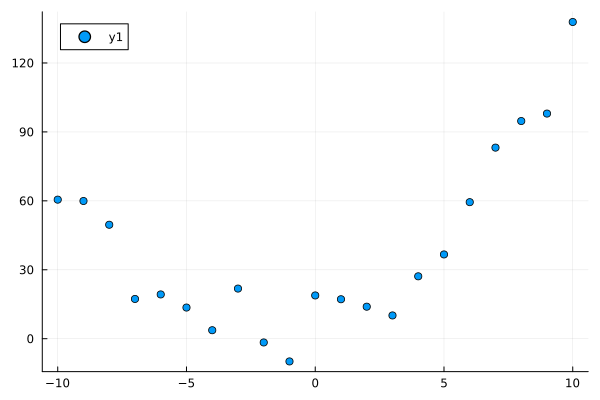

In [11]:
y_observed = x .^2 .+3 .*x .-2  + rand(d,length(x))
scatter(x,y_observed)

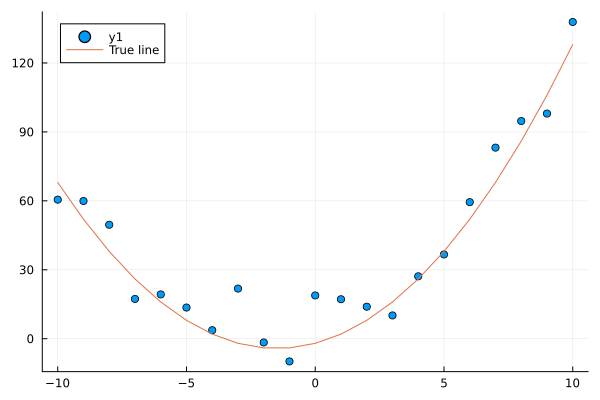

In [12]:
y_true = x .^2 .+3 .*x .-2 
plot!(x,y_true, label="True line")

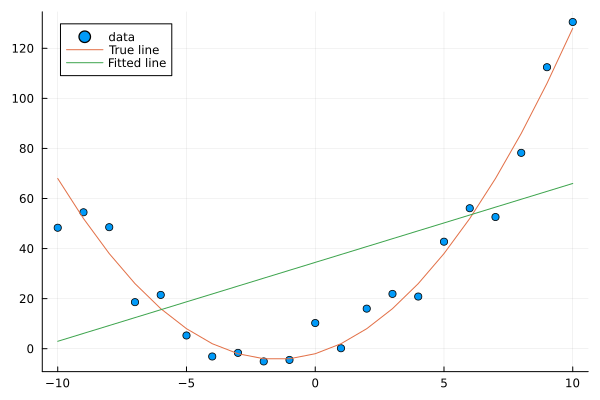

In [13]:
y_observed =  x .^2 .+3 .*x .-2  + rand(d,length(x))
y_true =  x .^2 .+3 .*x .-2 
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .*x
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [14]:
dataerr = 50.0
d = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=50.0)

In [15]:
y_observed = y_true + rand(d,length(x))

21-element Vector{Float64}:
  50.9712018613682
   6.229159447261907
 -36.55956763254102
  -5.763682014968396
 -12.139992938259102
   8.48007038843797
 101.796320816892
  58.656827487199685
  19.299748428847973
 -23.647030191671057
 -43.7641287487191
  13.965518660383706
  54.39439577284452
  -1.4259421024618746
  15.505222371302164
 153.38437542527038
 110.12955897581563
 103.42501863741997
  10.04529944805283
 123.48177013766647
 172.38370952860978

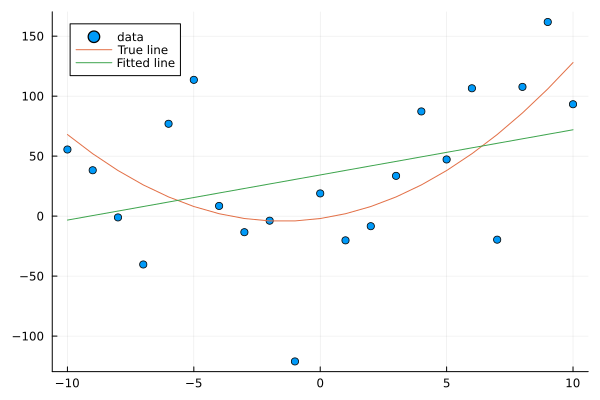

In [16]:
y_observed =  x .^2 .+3 .*x .-2  + rand(d,length(x))
y_true =  x .^2 .+3 .*x .-2 
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .*x
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

Yes, the fit in the new plot is closer to y_true.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [17]:
y_true = x .^10 .+ x .^2 .+3 .*x .-2 
dataerr = 10.0
d = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [18]:
y_observed = y_true + rand(d,length(x))

21-element Vector{Float64}:
     1.0000000068898907e10
     3.486784443572906e9
     1.0737418570528128e9
     2.8247526276793e8
     6.04661759903877e7
     9.765635246916687e6
     1.048579351795264e6
 59054.57791115998
  1021.8336278325335
    -1.7942292780739812
    13.746295644227713
    -1.1536123013853414
  1029.2767412842927
 59068.62497524236
     1.0485917772380596e6
     9.76566446273423e6
     6.046623220924514e7
     2.824753324326063e8
     1.0737419132329416e9
     3.4867845110454464e9
     1.0000000127062826e10

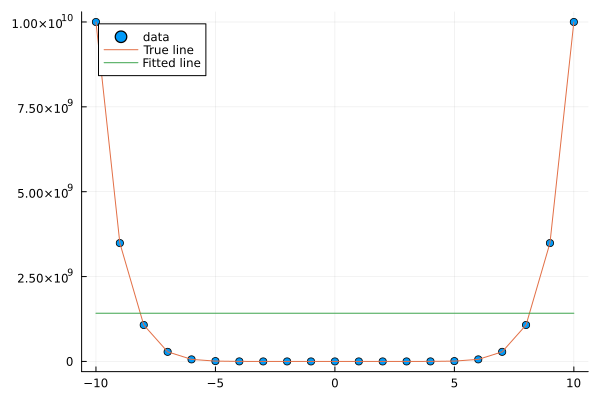

In [19]:
y_observed =  x .^10 .+ x .^2 .+3 .*x .-2   + rand(d,length(x))
y_true = x .^10 .+ x .^2 .+3 .*x .-2 
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .*x
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [20]:
x_fit = range(-11, 11; step = 0.1)
collect(x_fit)

221-element Vector{Float64}:
 -11.0
 -10.9
 -10.8
 -10.7
 -10.6
 -10.5
 -10.4
 -10.3
 -10.2
 -10.1
 -10.0
  -9.9
  -9.8
   ⋮
   9.9
  10.0
  10.1
  10.2
  10.3
  10.4
  10.5
  10.6
  10.7
  10.8
  10.9
  11.0

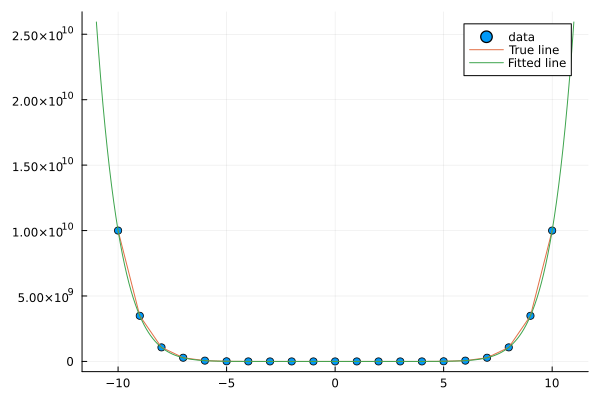

In [24]:
y_observed =  x .^10 .+ x .^2 .+3 .*x .-2   + rand(d,length(x))
y_true = x .^10 .+ x .^2 .+3 .*x .-2 
poly_fit = fit(x,y_observed,11)
x_fit = range(-11, 11; step = 0.1)
y_fitted = poly_fit.(x_fit)
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x_fit,y_fitted,label="Fitted line")

3. What do you observe in the plot? What is this phenomenon called?

The fitted line completely overlaps with the true line. This phenomenon is called overfitting. 